In [1]:
import pandas as pd
import os
from result_verification import load_data, get_vreg

In [2]:
di = load_data([os.path.join('data', file) for file in os.listdir('data')])
di

{'DADOS_CLP_202211111656 anew.csv [60]': {'Setpoint': 60,
  'data': 0     28
  1     31
  2     40
  3     58
  4     65
  5     73
  6     73
  7     61
  8     58
  9     61
  10    59
  11    62
  12    61
  13    61
  14    59
  15    59
  16    59
  17    61
  18    61
  19    61
  20    61
  21    59
  22    62
  23    61
  24    59
  Name: Output, dtype: int64,
  'control_signal': 0      99
  1     100
  2     100
  3      86
  4      75
  5      23
  6       1
  7      11
  8      22
  9      22
  10     21
  11     15
  12     15
  13     16
  14     11
  15     13
  16     21
  17     18
  18     19
  19     22
  20     16
  21     21
  22     14
  23     20
  24     19
  Name: PWM, dtype: int64},
 'DADOS_CLP_202211111656 anew.csv [140]': {'Setpoint': 140,
  'data': 0      64
  1      73
  2      82
  3      88
  4      98
       ... 
  70    137
  71    139
  72    140
  73    142
  74    140
  Name: Output, Length: 75, dtype: int64,
  'control_signal': 0     100
  1     100

In [3]:
import matplotlib.pyplot as plt

DADOS_CLP_202211111656 anew.csv [60]


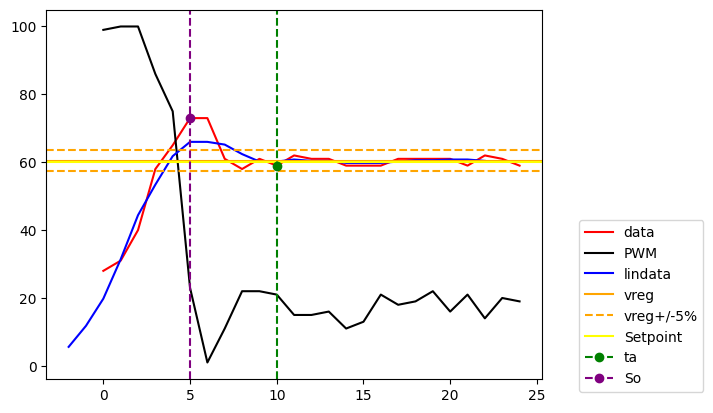

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,60,10,60.48,0.48,0.8%,12.52,20.7011%




--------------------------------------------


DADOS_CLP_202211111656 anew.csv [140]


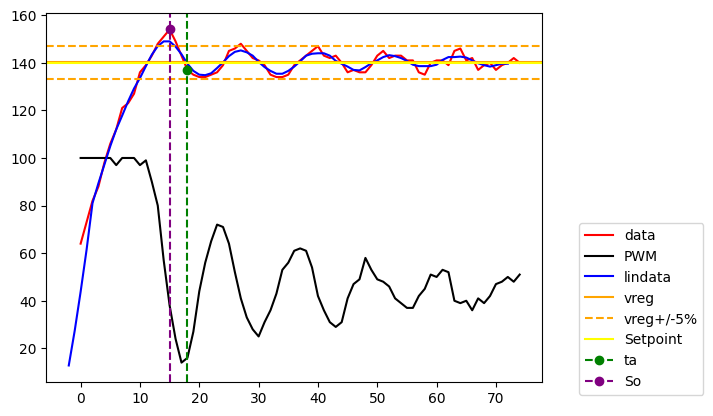

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,140,18,140.238596,0.238596,0.1704%,13.761404,9.8129%




--------------------------------------------


DADOS_CLP_202211111656 anew.csv [200]


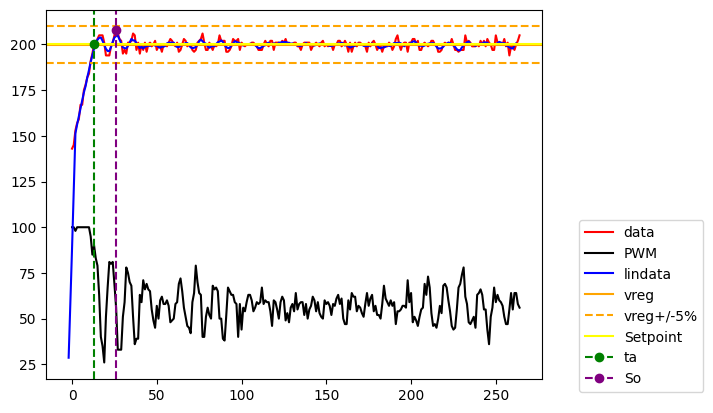

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,200,13,199.853175,-0.146825,-0.0734%,8.146825,4.0764%




--------------------------------------------


DADOS_CLP_202211111656.csv [60]


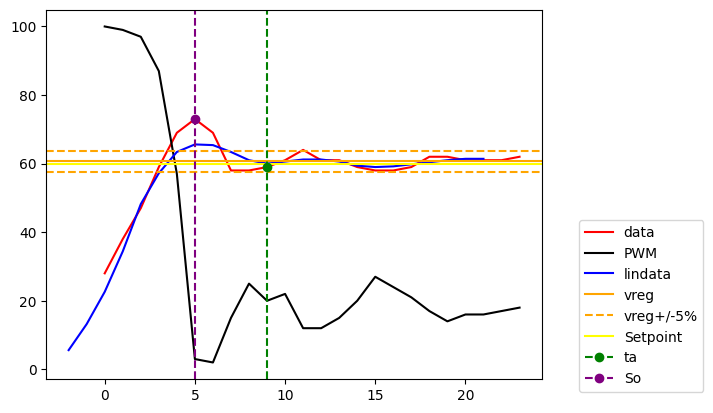

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,60,9,60.64,0.64,1.0667%,12.36,20.3826%




--------------------------------------------


DADOS_CLP_202211111656.csv [140]


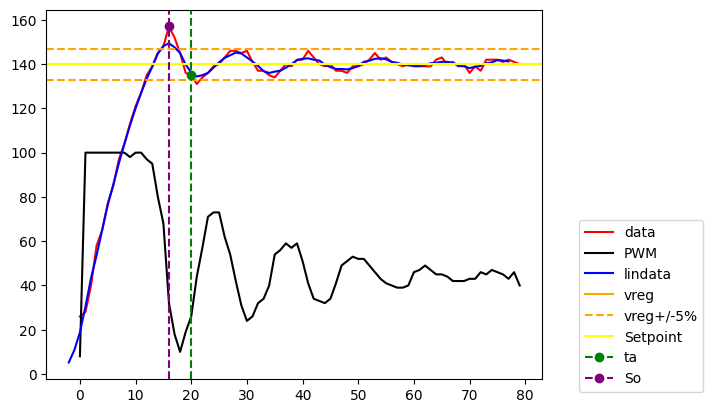

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,140,20,140.04,0.04,0.0286%,16.96,12.1108%




--------------------------------------------


DADOS_CLP_202211111656.csv [200]


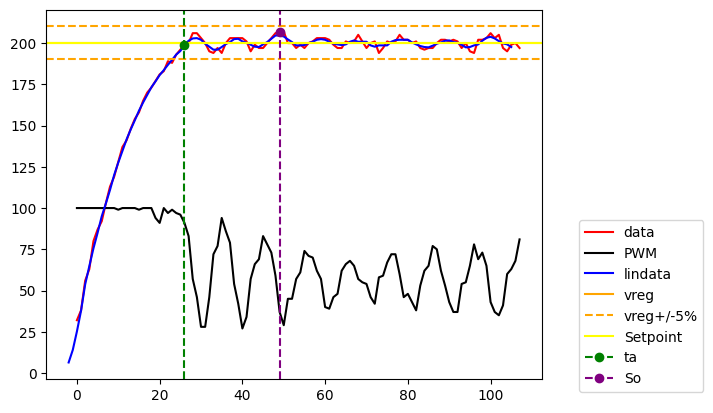

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,200,26,200.053659,0.053659,0.0268%,6.946341,3.4722%




--------------------------------------------




In [11]:
for name, info in di.items():
    info['ta'], info['vreg'], info['lin_data'] = get_vreg(info.get('data'), use_lin_filter=True, return_smoth_series=True)
    print(name)
    info.get('data').plot(color='red', label="data")
    info.get('control_signal').plot(color='black', label="PWM")

    info['lin_data'].index = info['lin_data'].index - 2
    info.get('lin_data').plot(color="blue", label="lindata")

    plt.axhline(y=info['vreg'], color='orange', label="vreg")
    plt.axhline(y=info['vreg']*1.05, color='orange', linestyle='--', label="vreg+/-5%")
    plt.axhline(y=info['vreg']*0.95, color='orange', linestyle='--')

    plt.axhline(y=info['Setpoint'], color='yellow', linestyle='-', label="Setpoint")

    pd.Series((info.get('data')[info['ta']], ), (info['ta'], )).plot(color="green", label="ta", linestyle='--', marker='o')
    plt.axvline(x=info['ta'], color='green', linestyle='--')
    pd.Series((info.get('data').max(), ), (info.get('data').argmax(), )).plot(color="purple", label="So", linestyle='--', marker='o')
    plt.axvline(x=info.get('data').argmax(), color='purple', linestyle='--')

    plt.legend(bbox_to_anchor = (1.2, 0.45), loc = 'upper center')
    plt.show()
    only_indicators_di = {
        'Setpoint': [info['Setpoint']],
        'ta': [info['ta']],
        'vreg': [info['vreg']],
        'ereg': [info['vreg']-info['Setpoint']],
        'ereg%': [str(round((100*info['vreg']/info['Setpoint'])-100, 4)) + '%'],
        'So': [info.get('data').max()-info['vreg']],
        'So%': [str(round((100*info.get('data').max()/info['vreg'])-100, 4)) + '%'],
    }
    display(pd.DataFrame(only_indicators_di))
    print("\n\n--------------------------------------------\n\n")
    # plt.show()

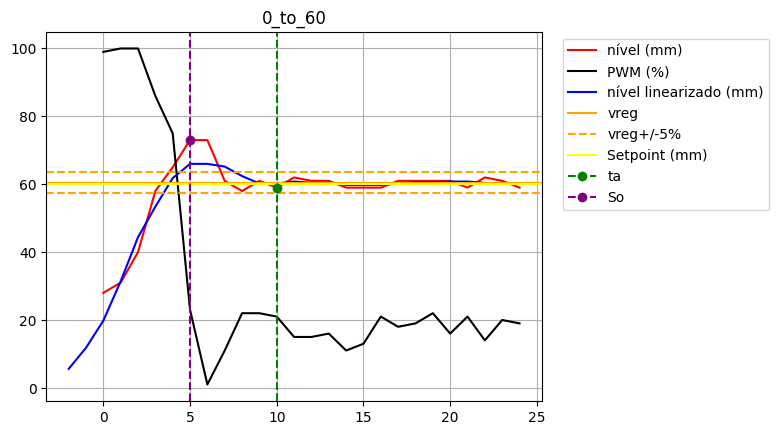

,Setpoint (mm),ta (s),vreg (mm),ereg (mm),ereg (%),So (mm),So (%)
0_to_60,60,10,60.48,0.48,0.8%,12.52,20.7011%




--------------------------------------------




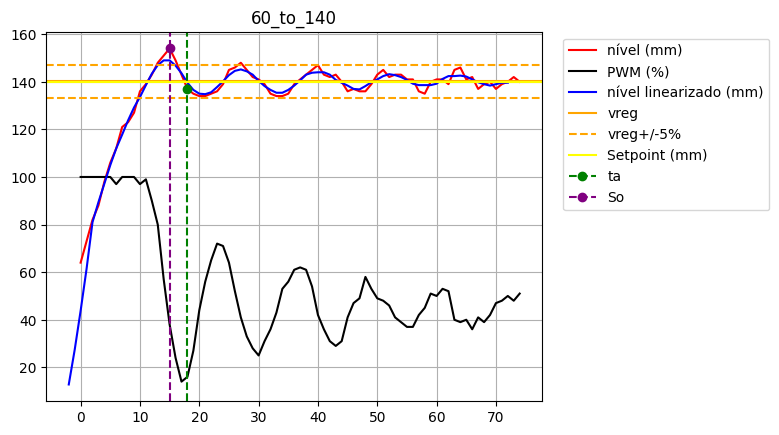

,Setpoint (mm),ta (s),vreg (mm),ereg (mm),ereg (%),So (mm),So (%)
60_to_140,140,18,140.238596,0.238596,0.1704%,13.761404,9.8129%




--------------------------------------------




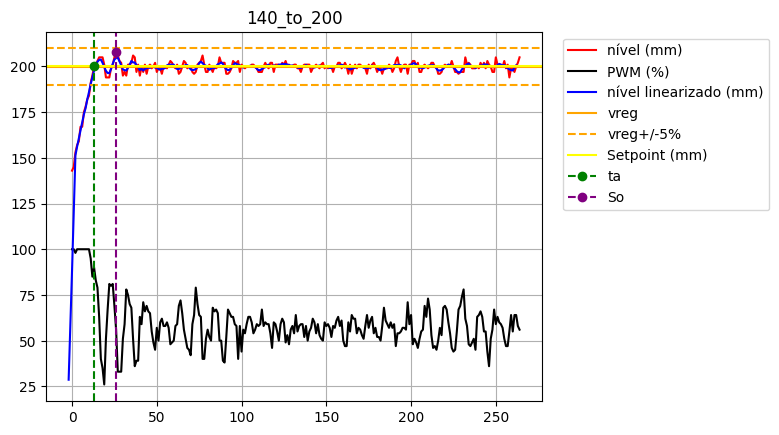

,Setpoint (mm),ta (s),vreg (mm),ereg (mm),ereg (%),So (mm),So (%)
140_to_200,200,13,199.853175,-0.146825,-0.0734%,8.146825,4.0764%




--------------------------------------------




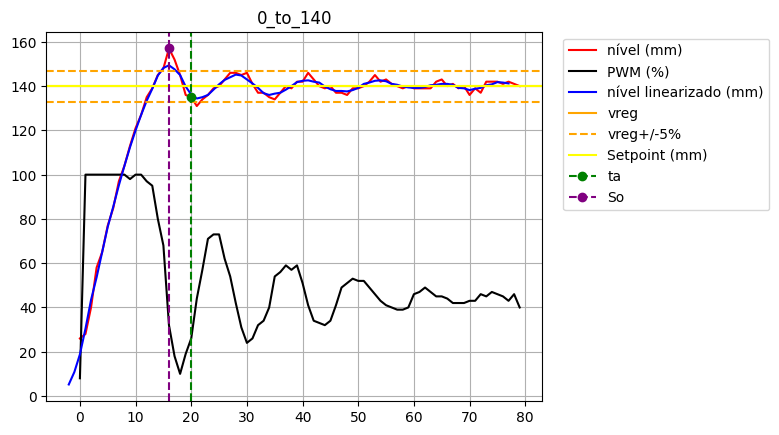

,Setpoint (mm),ta (s),vreg (mm),ereg (mm),ereg (%),So (mm),So (%)
0_to_140,140,20,140.04,0.04,0.0286%,16.96,12.1108%




--------------------------------------------




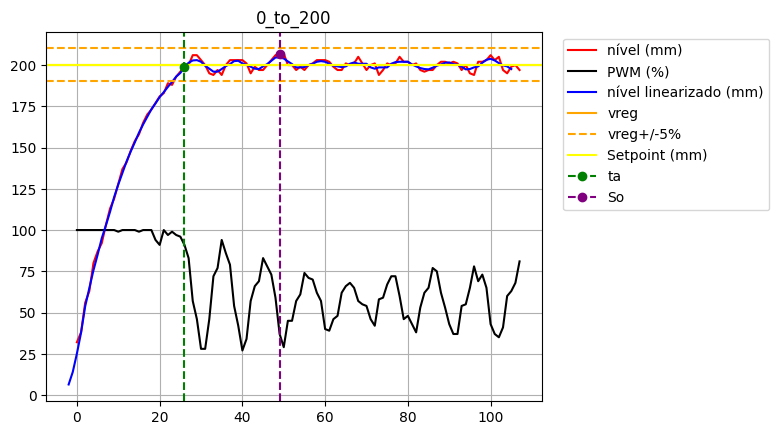

,Setpoint (mm),ta (s),vreg (mm),ereg (mm),ereg (%),So (mm),So (%)
0_to_200,200,26,200.053659,0.053659,0.0268%,6.946341,3.4722%




--------------------------------------------




,Setpoint (mm),ta (s),vreg (mm),ereg (mm),ereg (%),So (mm),So (%)
0_to_60,60,10,60.480000,0.480000,0.8%,12.520000,20.7011%
60_to_140,140,18,140.238596,0.238596,0.1704%,13.761404,9.8129%
140_to_200,200,13,199.853175,-0.146825,-0.0734%,8.146825,4.0764%
0_to_140,140,20,140.040000,0.040000,0.0286%,16.960000,12.1108%
0_to_200,200,26,200.053659,0.053659,0.0268%,6.946341,3.4722%


\begin{tabular}{lrrrrlrl}
\toprule
{} &  Setpoint (mm) &  ta (s) &   vreg (mm) &  ereg (mm) &  ereg (\%) &    So (mm) &    So (\%) \\
\midrule
0\_to\_60    &             60 &      10 &   60.480000 &   0.480000 &      0.8\% &  12.520000 &  20.7011\% \\
60\_to\_140  &            140 &      18 &  140.238596 &   0.238596 &   0.1704\% &  13.761404 &   9.8129\% \\
140\_to\_200 &            200 &      13 &  199.853175 &  -0.146825 &  -0.0734\% &   8.146825 &   4.0764\% \\
0\_to\_140   &            140 &      20 &  140.040000 &   0.040000 &   0.0286\% &  16.960000 &  12.1108\% \\
0\_to\_200   &            200 &      26 &  200.053659 &   0.053659 &   0.0268\% &   6.946341 &   3.4722\% \\
\bottomrule
\end{tabular}



C:\Users\luiz\AppData\Local\Temp\ipykernel_18772\3023750394.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [18]:
# print(di.keys())
renamed_di = {
    "0_to_60": di.get('DADOS_CLP_202211111656 anew.csv [60]'),
    "60_to_140": di.get('DADOS_CLP_202211111656 anew.csv [140]'),
    "140_to_200": di.get('DADOS_CLP_202211111656 anew.csv [200]'),
    "0_to_140": di.get('DADOS_CLP_202211111656.csv [140]'),
    "0_to_200": di.get('DADOS_CLP_202211111656.csv [200]'),
}
didi = {}
for name, info in renamed_di.items():
    info['ta'], info['vreg'], info['lin_data'] = get_vreg(info.get('data'), use_lin_filter=True, return_smoth_series=True)

    info.get('data').plot(color='red', label="nível (mm)")
    info.get('control_signal').plot(color='black', label="PWM (%)")

    info['lin_data'].index = info['lin_data'].index - 2
    info.get('lin_data').plot(color="blue", label="nível linearizado (mm)")
    plt.title(name)
    plt.axhline(y=info['vreg'], color='orange', label="vreg")
    plt.axhline(y=info['vreg']*1.05, color='orange', linestyle='--', label="vreg+/-5%")
    plt.axhline(y=info['vreg']*0.95, color='orange', linestyle='--')

    plt.axhline(y=info['Setpoint'], color='yellow', linestyle='-', label="Setpoint (mm)")

    pd.Series((info.get('data')[info['ta']], ), (info['ta'], )).plot(color="green", label="ta", linestyle='--', marker='o')
    plt.axvline(x=info['ta'], color='green', linestyle='--')
    pd.Series((info.get('data').max(), ), (info.get('data').argmax(), )).plot(color="purple", label="So", linestyle='--', marker='o')
    plt.axvline(x=info.get('data').argmax(), color='purple', linestyle='--')

    plt.legend(bbox_to_anchor = (1.25, 1), loc = 'upper center')
    plt.grid()
    plt.savefig(f'plot_{name}.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    only_indicators_di = {
        'Setpoint (mm)': info['Setpoint'],
        'ta (s)': info['ta'],
        'vreg (mm)': info['vreg'],
        'ereg (mm)': info['vreg']-info['Setpoint'],
        'ereg (%)': str(round((100*info['vreg']/info['Setpoint'])-100, 4)) + '%',
        'So (mm)': info.get('data').max()-info['vreg'],
        'So (%)': str(round((100*info.get('data').max()/info['vreg'])-100, 4)) + '%',
    }
    display(pd.DataFrame([only_indicators_di], index=[name]))
    didi[name] = only_indicators_di
    print("\n\n--------------------------------------------\n\n")
    # plt.show()
df = pd.DataFrame(data=list(didi.values()), index=list(didi.keys()))
display(df)
print(df.to_latex())